In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer
from pandas import DataFrame
%matplotlib inline

In [3]:
data = pd.read_csv('cs-training.csv',sep=';').drop('Unnamed: 0', axis = 1)

In [4]:
Cols = []
for i in range(len(data.columns)):
    Cols.append(data.columns[i].replace('-', ''))
data.columns = Cols

In [5]:
data = data.apply(lambda x: x.fillna(np.nanmedian(x),axis=0))

data = data.to_dict(orient='records')

vec = DictVectorizer()

df_data = vec.fit_transform(data).toarray()
feature_names = vec.get_feature_names()
df_data = DataFrame(
    df_data,
    columns=feature_names)


In [6]:
def plot_freq(l):
    ncount = l

    ax2=ax.twinx()

    ax2.yaxis.tick_left()
    ax.yaxis.tick_right()

    ax.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')

    ax2.set_ylabel('Frequency [%]')

    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom')

    ax2.set_ylim(0,100)
    ax2.grid(None)    

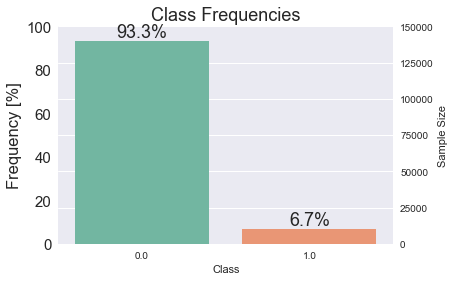

In [6]:
ax = sns.countplot(x = df_data.SeriousDlqin2yrs , palette="Set2")
sns.set(font_scale=1.5)
ax.set_ylim(top = len(data))
ax.set_xlabel('Class')
ax.set_ylabel('Sample Size')
plt.title('Class Frequencies')

plot_freq(l = len(df_data.SeriousDlqin2yrs))

plt.show()

## Linear Discriminant Analysis

In [7]:
from sklearn import  linear_model
#clf = linear_model.LogisticRegression(C=1e5)
#clf.fit(X_Train,Y_Train)
#clf.predict_proba(X[0])


Median: 0.1541807 
Mean: 6.0484381
Values less than 2 : 149629 in 150000. Ratio: 99.75267%


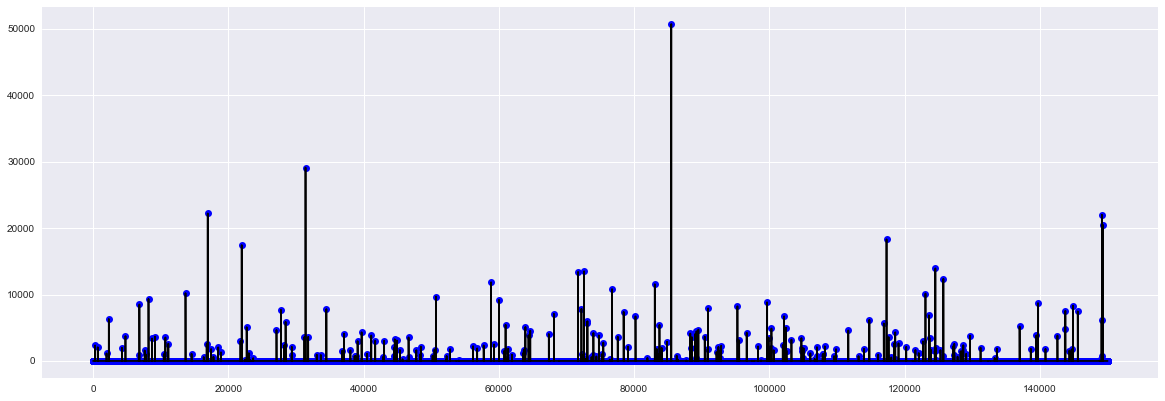

In [7]:
plt.figure(figsize=(20,15))
ax = plt.subplot(211)
plt.plot(df_data.RevolvingUtilizationOfUnsecuredLines, 'bo',df_data.RevolvingUtilizationOfUnsecuredLines, 'k')
print('Median: %.7f \nMean: %.7f' %(np.median(df_data.RevolvingUtilizationOfUnsecuredLines),np.mean(df_data.RevolvingUtilizationOfUnsecuredLines)))
ruoelLt2=len(df_data[df_data.RevolvingUtilizationOfUnsecuredLines < 2])
ruoelACt=len(df_data.RevolvingUtilizationOfUnsecuredLines)
print('Values less than 2 : %d in %d. Ratio: %.5f%%' %(ruoelLt2,ruoelACt,100*ruoelLt2/ruoelACt))


In [8]:
ind = np.where(df_data.RevolvingUtilizationOfUnsecuredLines>2)
df_data.RevolvingUtilizationOfUnsecuredLines[ind[0]] = 2.

Counter({0.0: 1,
         21.0: 183,
         22.0: 434,
         23.0: 641,
         24.0: 816,
         25.0: 953,
         26.0: 1193,
         27.0: 1338,
         28.0: 1560,
         29.0: 1702,
         30.0: 1937,
         31.0: 2038,
         32.0: 2050,
         33.0: 2239,
         34.0: 2155,
         35.0: 2246,
         36.0: 2379,
         37.0: 2521,
         38.0: 2631,
         39.0: 2987,
         40.0: 3093,
         41.0: 3122,
         42.0: 3082,
         43.0: 3208,
         44.0: 3294,
         45.0: 3502,
         46.0: 3714,
         47.0: 3719,
         48.0: 3806,
         49.0: 3837,
         50.0: 3753,
         51.0: 3627,
         52.0: 3609,
         53.0: 3648,
         54.0: 3561,
         55.0: 3416,
         56.0: 3589,
         57.0: 3375,
         58.0: 3443,
         59.0: 3280,
         60.0: 3258,
         61.0: 3522,
         62.0: 3568,
         63.0: 3719,
         64.0: 3058,
         65.0: 2594,
         66.0: 2494,
         67.0: 2503,
 

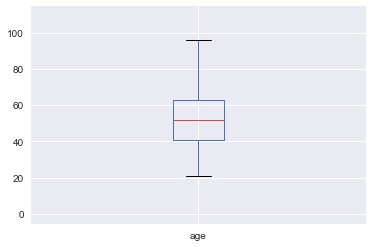

In [9]:
from collections import Counter
plt.figure(1)
df_data.age.plot.box()
Counter(df_data.age)


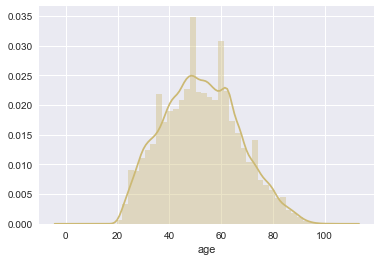

In [10]:
plt.figure(2)
sns.set_color_codes()
sns.distplot(df_data.age, color="y")
plt.show()

In [11]:
ind = np.where(df_data.age<21)
df_data.age[ind[0]] = 21.
ind = np.where(df_data.age>94)
df_data.age[ind[0]] = 94.


In [12]:
Counter(df_data.NumberOfTime3059DaysPastDueNotWorse)

Counter({0.0: 126018,
         1.0: 16033,
         2.0: 4598,
         3.0: 1754,
         4.0: 747,
         5.0: 342,
         6.0: 140,
         7.0: 54,
         8.0: 25,
         9.0: 12,
         10.0: 4,
         11.0: 1,
         12.0: 2,
         13.0: 1,
         96.0: 5,
         98.0: 264})

In [13]:
ind = np.where(df_data.NumberOfTime3059DaysPastDueNotWorse>95)
df_data.NumberOfTime3059DaysPastDueNotWorse[ind[0]] = 0.

In [14]:
def mad_based_outlier(points, thresh=3.5):
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

Median: 0.3665078 
Mean: 353.0050758


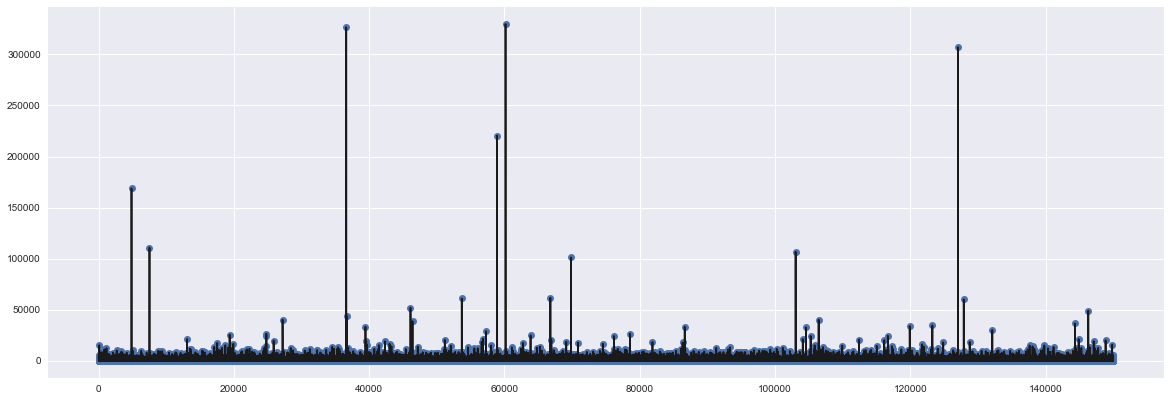

In [15]:
plt.figure(figsize=(20,15))
ax = plt.subplot(211)
plt.plot(df_data.DebtRatio, 'bo',df_data.DebtRatio, 'k')
print('Median: %.7f \nMean: %.7f' %(np.median(df_data.DebtRatio),np.mean(df_data.DebtRatio)))


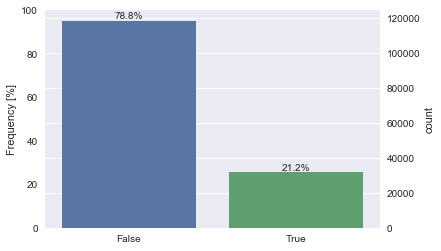

In [16]:
ax = sns.countplot(mad_based_outlier(df_data.DebtRatio))
plot_freq(l = len(df_data.DebtRatio))

In [17]:
minUpperBound = min([val for (val, out) in zip(df_data.DebtRatio, mad_based_outlier(df_data.DebtRatio)) if out == True])
ind = np.where(df_data.DebtRatio>minUpperBound)
df_data.DebtRatio[ind[0]] = minUpperBound

count    150000.000000
mean          0.607359
std           0.588294
min           0.000000
25%           0.175074
50%           0.366508
75%           0.868254
max           1.641791
Name: DebtRatio, dtype: float64

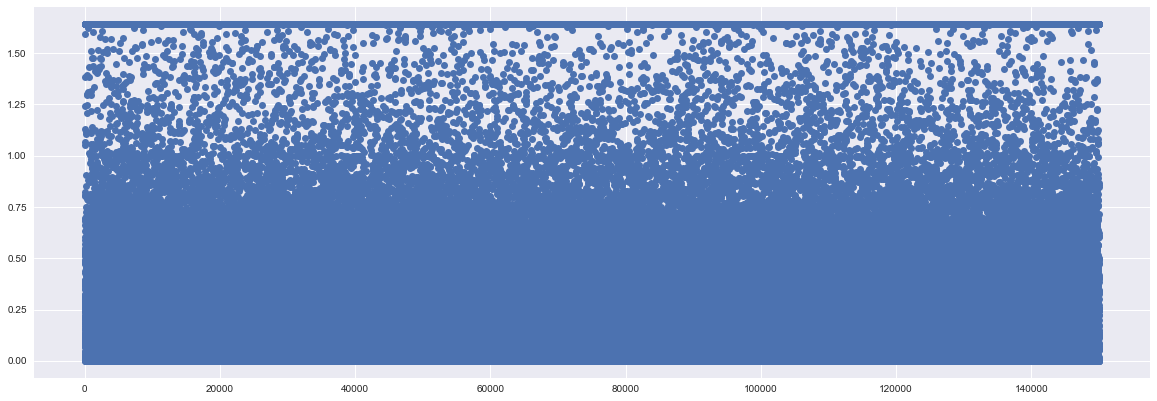

In [18]:
plt.figure(figsize=(20,15))
ax = plt.subplot(211)
plt.plot(df_data.DebtRatio, 'o')

df_data.DebtRatio.describe()

Median: 5400.0000000 
Mean: 6418.4549200


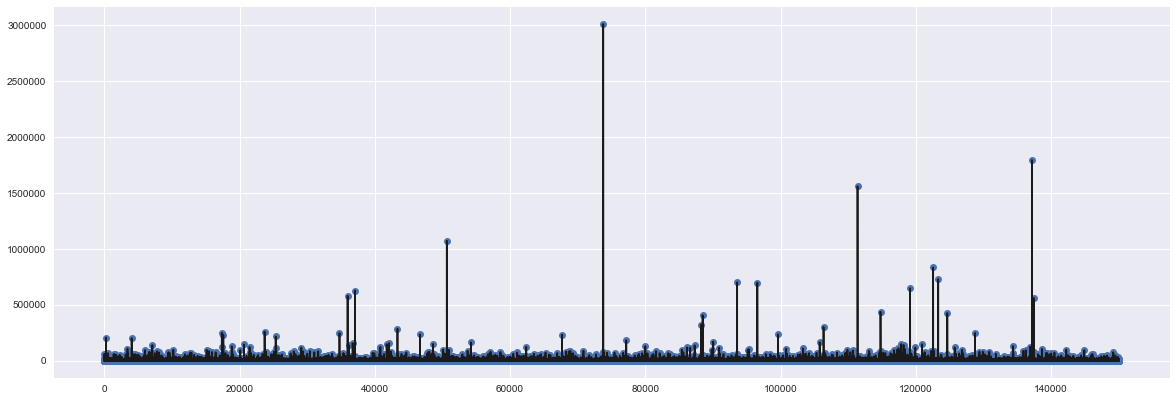

In [19]:
plt.figure(figsize=(20,15))
ax = plt.subplot(211)
plt.plot(df_data.MonthlyIncome, 'bo',df_data.MonthlyIncome, 'k')
print('Median: %.7f \nMean: %.7f' %(np.median(df_data.MonthlyIncome),np.mean(df_data.MonthlyIncome)))

In [20]:
maxUpperBound = min([val for (val, out) in zip(df_data.MonthlyIncome, mad_based_outlier(df_data.MonthlyIncome)) if out == True])
ind = np.where(df_data.MonthlyIncome>maxUpperBound)
df_data.MonthlyIncome[ind[0]] = maxUpperBound
ind = np.where(df_data.MonthlyIncome<1500)
df_data.MonthlyIncome[ind[0]] = 1500
df_data.MonthlyIncome.describe()

count    150000.000000
mean       5993.580100
std        3164.949126
min        1500.000000
25%        3903.000000
50%        5400.000000
75%        7400.000000
max       14128.000000
Name: MonthlyIncome, dtype: float64

In [21]:
Counter(df_data.NumberOfTimes90DaysLate)
ind = np.where(df_data.NumberOfTimes90DaysLate>95)
df_data.NumberOfTimes90DaysLate[ind[0]] = 0

In [22]:
Counter(df_data.NumberRealEstateLoansOrLines)
ind = np.where(df_data.NumberRealEstateLoansOrLines>16)
df_data.NumberRealEstateLoansOrLines[ind[0]] = 16


In [23]:
Counter(df_data.NumberOfTime6089DaysPastDueNotWorse)
ind = np.where(df_data.NumberOfTime6089DaysPastDueNotWorse>11)
df_data.NumberOfTime6089DaysPastDueNotWorse[ind[0]] = 0

In [24]:
Counter(df_data.NumberOfDependents)
ind = np.where(df_data.NumberOfDependents >10)
df_data.NumberOfDependents[ind[0]] = 10

In [25]:
outcome_feature = df_data['SeriousDlqin2yrs']
target_features = df_data.drop('SeriousDlqin2yrs', axis=1)

from sklearn.model_selection import train_test_split
"""
    X_1: independent (target) variables for first data set
    Y_1: dependent (outcome) variable for first data set
    X_2: independent (target) variables for the second data set
    Y_2: dependent (outcome) variable for the second data set
"""
X_train, X_test, Y_train, Y_test = train_test_split(target_features, outcome_feature, test_size=0.5, random_state=0)
from sklearn.metrics import confusion_matrix

In [26]:
from sklearn import tree
clf2 = tree.DecisionTreeClassifier(class_weight='balanced',min_impurity_split=1e-05,max_depth=6)
clf2.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-05, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [75]:
Y_pred = clf2.predict(X_test)
pd.crosstab(Y_test, Y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0.0,1.0,All
True,,,
0.0,50585,19432,70017
1.0,936,4047,4983
All,51521,23479,75000


In [28]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB(priors=[0.07,0.93])
gnb.fit(X_train,Y_train)

GaussianNB(priors=[0.07, 0.93])

In [77]:
Y_pred = gnb.predict(X_test)
pd.crosstab(Y_test, Y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0.0,1.0,All
True,,,
0.0,56333,13684,70017
1.0,1219,3764,4983
All,57552,17448,75000


In [34]:
from sklearn import svm
clf3 = svm.SVC(C=2,cache_size=7000,tol=1,class_weight={0:.1,1:.9} )
clf3.fit(X_train,Y_train)

SVC(C=2, cache_size=7000, class_weight={0: 0.1, 1: 0.9}, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True, tol=1,
  verbose=False)

In [35]:
Y_pred = clf3.predict(X_test)
pd.crosstab(Y_test, Y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0.0,1.0,All
True,,,
0.0,60033,9984,70017
1.0,3432,1551,4983
All,63465,11535,75000


In [30]:
from sklearn.neural_network import MLPClassifier
clf4 = MLPClassifier(activation="identity", tol= 0.1)
clf4.fit(X_train, Y_train) 

MLPClassifier(activation='identity', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.1, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [79]:
from sklearn.metrics import confusion_matrix
Y_pred = clf4.predict(X_test)
pd.crosstab(Y_test, Y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0.0,1.0,All
True,,,
0.0,68561,1456,70017
1.0,3626,1357,4983
All,72187,2813,75000


In [32]:
from sklearn import  linear_model
clf = linear_model.LogisticRegression(C=1e5,class_weight= {0:.1, 1:.9} )
clf.fit(X_train,Y_train)

LogisticRegression(C=100000.0, class_weight={0: 0.1, 1: 0.9}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [33]:
Y_pred = clf.predict(X_test)
netMat = (Y_pred == Y_test)
clf.coef_
ind = np.where(Y_test == 1)
Counter(Y_pred[ind])
pd.crosstab(Y_test, Y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0.0,1.0,All
True,,,
0.0,61853,8164,70017
1.0,1840,3143,4983
All,63693,11307,75000


In [68]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import *
from IPython.display import display
import ipywidgets as widgets
plt.style.use('ggplot')


form_item_layout = widgets.Layout(
    display='flex',
    flex_flow='row',
    justify_content='space-between'
)



text = widgets.Text(
    placeholder='Enes',
    disabled=False
)

button = widgets.Button(description="Check credibility")

resultLabel = widgets.Label(
    value="",
    visible = False,
    disabled = True
)

revolve = widgets.FloatSlider(
    value=df_data.RevolvingUtilizationOfUnsecuredLines.median(),
    min=df_data.RevolvingUtilizationOfUnsecuredLines.min(),
    max=df_data.RevolvingUtilizationOfUnsecuredLines.max(),
    step=0.01,
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='.4f',
    slider_color='black'
)
age = widgets.IntSlider(
    value=df_data.age.median(),
    min=df_data.age.min(),
    max=df_data.age.max(),
    step=1,
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    slider_color='black'
)
income = widgets.FloatSlider(
    value=df_data.MonthlyIncome.median(),
    min=df_data.MonthlyIncome.min(),
    max=df_data.MonthlyIncome.max(),
    step=0.5,
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
    slider_color='black'
)
debtRatio = widgets.FloatSlider(
    value=df_data.DebtRatio.median(),
    min=df_data.DebtRatio.min(),
    max=df_data.DebtRatio.max(),
    step=0.01,
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='.4f',
    slider_color='black'
)
NumberOfTime3059DaysPastDueNotWorse = widgets.IntSlider(
    value=df_data.NumberOfTime3059DaysPastDueNotWorse.median(),
    min=df_data.NumberOfTime3059DaysPastDueNotWorse.min(),
    max=df_data.NumberOfTime3059DaysPastDueNotWorse.max(),
    step=1,
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    slider_color='black'
)
NumberOfTimes90DaysLate =  widgets.IntSlider(
    value=df_data.NumberOfTimes90DaysLate.median(),
    min=df_data.NumberOfTimes90DaysLate.min(),
    max=df_data.NumberOfTimes90DaysLate.max(),
    step=1,
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    slider_color='black'
)
NumberRealEstateLoansOrLines =  widgets.IntSlider(
    value=df_data.NumberRealEstateLoansOrLines.median(),
    min=df_data.NumberRealEstateLoansOrLines.min(),
    max=df_data.NumberRealEstateLoansOrLines.max(),
    step=1,
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    slider_color='black'
)
NumberOfTime6089DaysPastDueNotWorse =  widgets.IntSlider(
    value=df_data.NumberOfTime6089DaysPastDueNotWorse.median(),
    min=df_data.NumberOfTime6089DaysPastDueNotWorse.min(),
    max=df_data.NumberOfTime6089DaysPastDueNotWorse.max(),
    step=1,
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    slider_color='black'
)
NumberOfOpenCreditLinesAndLoans = widgets.IntSlider(
    value=df_data.NumberOfOpenCreditLinesAndLoans.median(),
    min=df_data.NumberOfOpenCreditLinesAndLoans.min(),
    max=df_data.NumberOfOpenCreditLinesAndLoans.max(),
    step=1,
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    slider_color='black'
)

NumberOfDependents =  widgets.IntSlider(
    value=df_data.NumberOfDependents.median(),
    min=df_data.NumberOfDependents.min(),
    max=df_data.NumberOfDependents.max(),
    step=1,
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    slider_color='black'
)
algos = widgets.Dropdown(options=['Decision Tree', 'SVM', 'Logistic Regression','GaussianNB','MLP'])


form_items = [
   Box([Label(value='Please, enter the name:'), text], layout=form_item_layout),
   Box([Label(value='Revolving Util. of Unsecured Lines:'), revolve], layout=form_item_layout),
   Box([Label(value='Age:'), age], layout=form_item_layout),
   Box([Label(value='Monthly Income:'), income], layout=form_item_layout),
   Box([Label(value='Dept Ratio:'), debtRatio], layout=form_item_layout),
   Box([Label(value='NumberOfOpenCreditLinesAndLoans:'), NumberOfOpenCreditLinesAndLoans], layout=form_item_layout),
   Box([Label(value='NumberOfTime3059DaysPastDueNotWorse:'), NumberOfTime3059DaysPastDueNotWorse], layout=form_item_layout),
   Box([Label(value='NumberOfTimes90DaysLate:'), NumberOfTimes90DaysLate], layout=form_item_layout),
   Box([Label(value='NumberRealEstateLoansOrLines:'), NumberRealEstateLoansOrLines], layout=form_item_layout),
   Box([Label(value='NumberOfTime6089DaysPastDueNotWorse:'), NumberOfTime6089DaysPastDueNotWorse], layout=form_item_layout),
   Box([Label(value='NumberOfDependents:'), NumberOfDependents], layout=form_item_layout),
   Box([Label(value='Algorithm:'),algos], layout=form_item_layout),
   button,
   Box([Label(value='Result:'), resultLabel], layout=form_item_layout),
]

form = Box(form_items, layout=Layout(
    display='flex',
    flex_flow='column',
    border='dashed 2px',
    align_items='stretch',
    width= '70%'
))

display(form)

      
def on_button_clicked(b):
    name = text.value
    roul = revolve.value
    ageV = age.value
    monI = income.value
    dratio = debtRatio.value
    noOpCL = NumberOfOpenCreditLinesAndLoans.value
    noT3059 = NumberOfTime3059DaysPastDueNotWorse.value
    noT90 = NumberOfTimes90DaysLate.value
    nreL = NumberRealEstateLoansOrLines.value
    noT6089 = NumberOfTime6089DaysPastDueNotWorse.value
    noD = NumberOfDependents.value
    algo = algos.value
    
    testARR = [[dratio,monI,noD,noOpCL,noT3059,noT6089,noT90,nreL,roul,ageV]]
    yGuess  = []
    
    if   algo == 'Decision Tree':
        yGuess = clf2.predict(testARR)
    elif algo == 'SVM':
        yGuess = clf3.predict(testARR)
    elif algo == 'Logistic Regression':
        yGuess = clf.predict(testARR)
    elif algo == 'GaussianNB':
        yGuess = gnb.predict(testARR)
    else: 
        yGuess = clf4.predict(testARR)
    
    print(name,roul,ageV,monI,dratio,noOpCL,noT3059,noT90,nreL,noT6089,noD,algo,yGuess[0])
    
    if(resultLabel.visible == False and yGuess[0] == 0):
        resultLabel.value = text.value + ' can be provided with the loan.'    
    else:
        resultLabel.value = text.value + ' should not be provided with the loan.'
        
button.on_click(on_button_clicked)
plt.show()


Enes 0.154180737 52 5400.0 0.366507841 8 0 0 1 0 0 Decision Tree 0.0
Enes 0.154180737 52 5400.0 0.366507841 8 0 0 1 0 0 SVM 0.0
Enes 0.154180737 52 5400.0 0.366507841 8 0 0 1 0 0 Logistic Regression 0.0
Enes 0.154180737 52 5400.0 0.366507841 8 0 0 1 0 0 GaussianNB 0.0
Enes 0.154180737 52 5400.0 0.366507841 8 0 0 1 0 0 MLP 0.0
Enes 1.54 52 5400.0 1.06 34 6 9 10 6 6 Decision Tree 1.0
Enes 1.54 52 5400.0 1.06 34 6 9 10 6 6 SVM 0.0
Enes 1.54 52 5400.0 1.06 34 6 9 10 6 6 Logistic Regression 1.0
Enes 1.54 52 5400.0 1.06 34 6 9 10 6 6 GaussianNB 1.0
Enes 1.54 52 5400.0 1.06 34 6 9 10 6 6 MLP 1.0


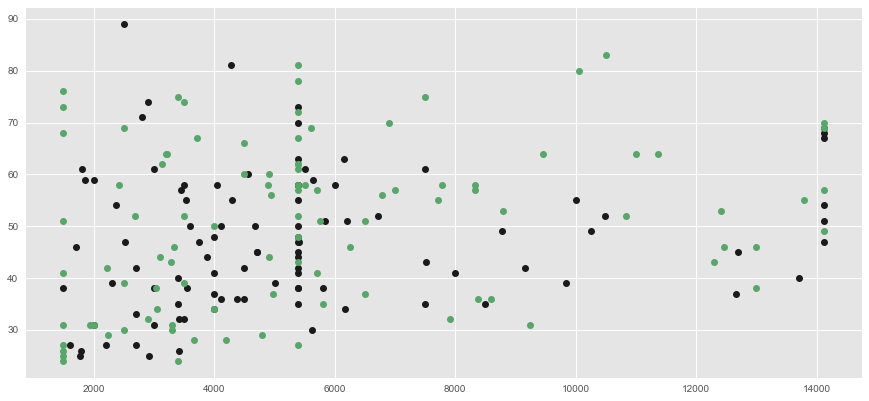

In [66]:
ind = df_data.SeriousDlqin2yrs[df_data.SeriousDlqin2yrs == 1]
ind = ind[1:100]
ind2 = df_data.SeriousDlqin2yrs[df_data.SeriousDlqin2yrs == 0]
ind2 = ind2[1:100]
%matplotlib inline
plt.figure(figsize=(15,15))
ax = plt.subplot(211)
#ax.set_ylim(0,20)
plt.plot(df_data.MonthlyIncome[ind.index],df_data.age[ind.index], 'ko',df_data.MonthlyIncome[ind2.index],df_data.age[ind2.index], 'go')


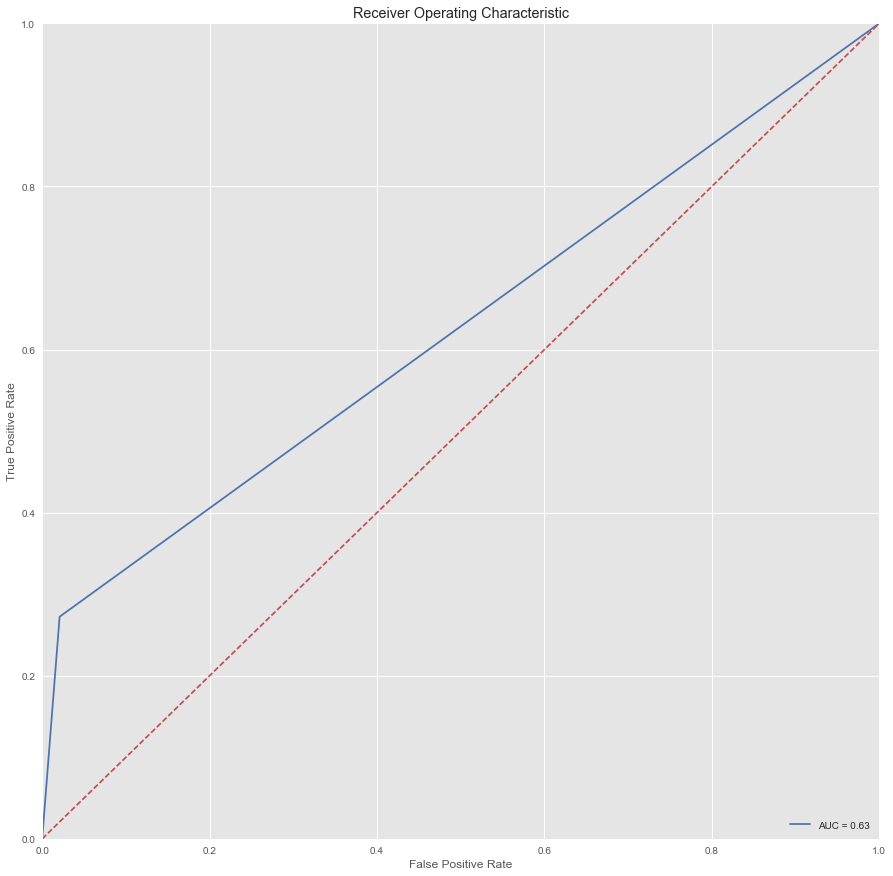

In [80]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, threshold = roc_curve(Y_test, Y_pred)
roc_auc = auc(fpr, tpr)

%matplotlib inline

plt.figure(figsize=(15,15))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
